## Super dummy weights

In [1]:
import numpy as np
import cv2 as cv
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [10]:
# make some data 

images = np.random.randn(3,2,2)
masks = np.random.randint(3,size = (3,2,2))
#weights = np.random.randint(2,size = (3,2,2))
weights = np.zeros([3,2,2])

In [4]:
images.shape

(3, 2, 2)

In [11]:
#very simple network 

weights[0,0,0]=1

In [12]:
images = tf.convert_to_tensor(images,dtype =tf.float32)
masks = tf.convert_to_tensor(masks,dtype =tf.float32)

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((images,masks,weights))

train_batches = (
    train_dataset
    .cache()
    #.shuffle(BUFFER_SIZE)
    .batch(3)
    #.repeat()
    #.map(Augment())
    .prefetch(buffer_size=tf.data.AUTOTUNE))

In [281]:
#simple model
def shallow_model(output_channels:int):
    inputs = tf.keras.layers.Input(shape=[2, 2, 1])
    
    #down
    x = tf.keras.layers.Conv2D(filters=10,kernel_size=2,strides=2,activation="relu",padding="same")(inputs)
    
    #x = tf.keras.layers.Conv2D(10,2,2,activation="relu")(x)
    
    
    #up
    #x = tf.keras.layers.Conv2DTranspose(5,2,2,activation="relu")(x)
    
    last = tf.keras.layers.Conv2DTranspose(
    filters=output_channels, kernel_size=2, strides=2,
    padding='same')
    
    x = last(x)
    
    return tf.keras.Model(inputs=inputs, outputs=x)

In [26]:
OUTPUT_CLASSES=3


#if we do 4 classes, I guess we'll need to set the loss to CategoricalCrossentropy. 
#But does pix2pix even work with that? It seemed to/not work earlier. 
model = shallow_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              sample_weight_mode = "temporal",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

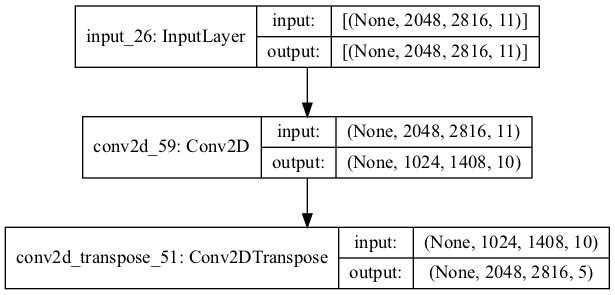

In [304]:
tf.keras.utils.plot_model(model, show_shabpes=True)

In [305]:
model.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 2048, 2816, 11)]  0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 1024, 1408, 10)    450       
_________________________________________________________________
conv2d_transpose_51 (Conv2DT (None, 2048, 2816, 5)     205       
Total params: 655
Trainable params: 655
Non-trainable params: 0
_________________________________________________________________


In [28]:
tb_callback = tf.keras.callbacks.TensorBoard(update_freq=5)

2022-06-07 14:05:35.429880: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-06-07 14:05:35.429924: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-06-07 14:05:35.430114: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [29]:
EPOCHS = 100
#VAL_SUBSPLITS = 5
#VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

#get validation working!

model_history = model.fit(train_batches, 
                          #class_weight = {0:1,1:1,2:1,3:1,4:0},
                          #sample_weight = weights,
                          epochs=EPOCHS,
                          #steps_per_epoch=STEPS_PER_EPOCH,
                          #validation_steps=VALIDATION_STEPS,
                          #validation_data=test_batches,
                          callbacks=tb_callback
                         )

Epoch 1/100
1/1 [==============================] - 0s 283ms/step - loss: 0.0916 - accuracy: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0914 - accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0913 - accuracy: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0912 - accuracy: 0.3333


2022-06-07 14:05:37.285693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-07 14:05:37.418772: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-06-07 14:05:37.418788: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-06-07 14:05:37.444536: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-06-07 14:05:37.445288: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-06-07 14:05:37.446052: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_06_07_14_05_37

2022-06-07 14:05:37.446954: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_06_07_14_05_37/Coles-MacBook-Pro.local.trace.json.gz
2022-06-07 14:05:3

Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0911 - accuracy: 0.3333
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0910 - accuracy: 0.3333
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0909 - accuracy: 0.3333
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0908 - accuracy: 0.3333
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 0.0907 - accuracy: 0.3333
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0906 - accuracy: 0.3333
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 0.0904 - accuracy: 0.3333
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0903 - accuracy: 0.3333
Epoch 13/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0902 - accuracy: 0.3333
Epoch 14/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0901 - accuracy: 0.3333
Epoch 15/100
1/1 [===

1/1 [==============================] - 0s 8ms/step - loss: 0.0823 - accuracy: 0.3333
Epoch 89/100
1/1 [==============================] - 0s 9ms/step - loss: 0.0822 - accuracy: 0.3333
Epoch 90/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0821 - accuracy: 0.3333
Epoch 91/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0820 - accuracy: 0.3333
Epoch 92/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0819 - accuracy: 0.3333
Epoch 93/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0817 - accuracy: 0.3333
Epoch 94/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0816 - accuracy: 0.3333
Epoch 95/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0815 - accuracy: 0.3333
Epoch 96/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0814 - accuracy: 0.3333
Epoch 97/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0813 - accuracy: 0.3333
Epoch 98/100
1/1 [===============

In [ ]:
#this seems to do the right thing...


# Same thing on actual images with more channels?

In [30]:
# weights should hopefully be something with the same shape as masks.

In [31]:
XDIM = 2048
YDIM = 11*XDIM//8 # tried to get an arbitrary approximation that's also highly divisible by 2

#might want to do 1024 x 1024 instead, idk.

def load_marsh_images(folder):
    images = []
    
    for i in range(1,12):
        img = cv.imread(os.path.join(folder,"Band%d.jpg" % i))
        #print("Band%d.jpg" % i)
        if img is not None:
            #convert to black and white
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            img = cv.resize(img,(YDIM, XDIM))
            #warp so the mask is square
            #img = cv.warpPerspective(img,Mpad,(SIZE+2*PAD,SIZE+2*PAD))
            images.append(img)
    return images

In [32]:
gce_imgs = load_marsh_images("train_jpg/GCE")
pie_imgs = load_marsh_images("train_jpg/PIE")
vcr_imgs = load_marsh_images("train_jpg/VCR")
images = np.array([gce_imgs,pie_imgs,vcr_imgs])

In [33]:
images.shape

(3, 11, 2048, 2816)

In [170]:
#load masks
gce_mask = cv.imread("new-masks/updated_GCE_mask.jpg")
pie_mask = cv.imread("new-masks/updated_PIE_mask.jpg")
vcr_mask = cv.imread("new-masks/updated_VCR_map.jpg")

new_masks = [cv.cvtColor(gce_mask, cv.COLOR_BGR2GRAY), 
         cv.cvtColor(pie_mask, cv.COLOR_BGR2GRAY), 
         cv.cvtColor(vcr_mask, cv.COLOR_BGR2GRAY)]
masks = []
for m in new_masks:
    m = cv.resize(m,(YDIM,XDIM))
    masks.append(m)
new_masks = masks

#change the values in the mask to integers from 1 to 5 instead of the weird 0-255 values currently in there


THRESH = [90,120,140,180]

masks = []
weights = []
for mask in new_masks:
    int_mask = np.zeros_like(mask)
    for t in THRESH:
        is_bigger = mask >= t
        is_bigger = is_bigger.astype(int)
        int_mask = int_mask + is_bigger
        
    #the final one is the unlabeled stuff; so we get that and convert it to 0 on unlabeled and 1 on labeled
    #is_bigger = is_bigger.astype(bool)
    is_bigger = np.logical_not(is_bigger)
    is_bigger = is_bigger.astype(int)
    
    #doing this to get the 1d sample weights to work
    is_bigger = np.reshape(is_bigger, (XDIM,YDIM,1))
    #is_bigger = np.reshape(is_bigger,[-1,1])
    
    int_mask = np.reshape(int_mask, (1,XDIM,YDIM))
    masks.append(int_mask)
    weights.append(is_bigger)
        
masks = np.array(masks)
weights = np.array(weights)
#try it with zero weights, see what happens
#weights = np.ones_like(weights)

In [145]:
masks.shape, weights.shape

((3, 1, 2048, 2816), (3, 2048, 2816, 1))

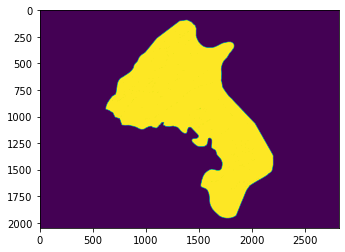

In [146]:
plt.imshow(weights[0,:,:,0])

In [148]:
weights[0,250,250,0]

0

In [171]:
def get_tensor(images):
    images_tensor = tf.convert_to_tensor(images,dtype =tf.float32)
    
    SAMPLES,BANDS,HEIGHT,WIDTH = images_tensor.shape
    #print(list(a))
    #b = [1]
    #b.extend(list(a))
    #image_tensor = tf.reshape(images_tensor,[SAMPLES,HEIGHT,WIDTH,BANDS])
    image_tensor = tf.transpose(images_tensor,[0,2,3,1])
    return image_tensor

In [172]:
train_images = get_tensor(images)
train_masks = get_tensor(masks)

In [50]:
# convert to tensors 

train_images = tf.convert_to_tensor(images,dtype =tf.float32)
train_masks = tf.convert_to_tensor(masks,dtype =tf.float32)

In [173]:
train_images.shape, train_masks.shape

(TensorShape([3, 2048, 2816, 11]), TensorShape([3, 2048, 2816, 1]))

In [198]:
weighted_train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_masks,weights))

In [199]:
weighted_train_batches = (
    weighted_train_dataset
    .cache()
    #.shuffle(BUFFER_SIZE)
    .batch(3)
    #.repeat()
    #.map(Augment())
    .prefetch(buffer_size=tf.data.AUTOTUNE))

In [213]:
def shallow_model(output_channels:int):
    inputs = tf.keras.layers.Input(shape=[XDIM, YDIM,11])
    
    #for debugging, fix input size
    #inputs = tf.keras.layers.Input(shape=[256, 512, 11])
    
    #down
    
    #first layer
    
    #convolutional
    x1 = tf.keras.layers.Conv2D(filters=5,kernel_size=4,strides=2,activation="relu",padding="same")(inputs)
    
    #second layer
    
    #usual convolution
    x2 = tf.keras.layers.Conv2D(filters=10,kernel_size=2,strides=2,activation="relu",padding="same")(x1)
    
    #maxpool
    #x2 = tf.keras.layers.MaxPooling2D(
    #pool_size=(2, 2), strides=None, padding="valid")(x2)
    
    
    """
    #dilated convolution
    y = tf.keras.layers.Conv2D(filters=5,kernel_size=2,dilation_rate=8, padding="valid",activation="relu")(x)
    
    #crop x to be same size as y so concat makes sense 
    #if x has shape x1,x2 and y has shape y1,y2 we want 
    #the part of x that starts at ((x1-y1)/2, (x2-y2)/2) and ends at ((x_1 + y_1)/2, (x_2 + y_2)/2)
    #i.e. the "middle y" of x.
    xdim1,xdim2 = x.shape[1],x.shape[2]
    ydim1,ydim2 = y.shape[1],y.shape[2]
    crop1 = (xdim1-ydim1)//2
    crop2 = (xdim2-ydim2)//2
    x = tf.keras.layers.Cropping2D(cropping=((crop1, crop2), (crop1, crop2)))(x)
    #need to make x,y same size before concatenating - simply cut off some of x?
    x = concat([x,y])
    """
    
    #third layer 
    
    x = tf.keras.layers.Conv2D(filters=10,kernel_size=2,strides=2,activation="relu",padding="same")(x2)
    #x = concat([x,x2])
    
    #up fourth layer
    
    x = tf.keras.layers.Conv2DTranspose(10,2,2,activation="relu",padding="same")(x)
    
    concat = tf.keras.layers.Concatenate()

    x = concat([x,x2])
    #fifth layer
    
    #dilation
    #x = tf.keras.layers.Conv2DTranspose(5,2,dilation_rate=2,activation="relu",padding="same")(x)
    #then upsample
    x = tf.keras.layers.Conv2DTranspose(5,2,2,activation="relu",padding="same")(x)
    
    last = tf.keras.layers.Conv2DTranspose(
    filters=5, kernel_size=2, strides=2,activation="relu")
    concat = tf.keras.layers.Concatenate()
    x = concat([x,x1])
    
    x=last(x)
    
    last = tf.keras.layers.Conv2DTranspose(
    filters=output_channels, kernel_size=2, strides=1, padding="same",activation="relu")
    
    concat = tf.keras.layers.Concatenate()
    x = concat([x,inputs])   
    x = last(x)
    
    #crop to correct output shape 
    
    #xdim1,xdim2 = x.shape[1],x.shape[2]
    #ydim1,ydim2 = y.shape[1],y.shape[2]
    #crop1 = (xdim1-ydim1)//2
    #crop2 = (xdim2-ydim2)//2
    #x = tf.keras.layers.Cropping2D(cropping=((PAD, PAD), (PAD, PAD)))(x)
    #need to make x,y same size before concatenating - simply cut off some of x?
    #x = concat([x,y])
    
    return tf.keras.Model(inputs=inputs, outputs=x)

In [205]:
OUTPUT_CLASSES=5


#if we do 4 classes, I guess we'll need to set the loss to CategoricalCrossentropy. 
#But does pix2pix even work with that? It seemed to/not work earlier. 
model = shallow_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              sample_weight_mode = "temporal",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

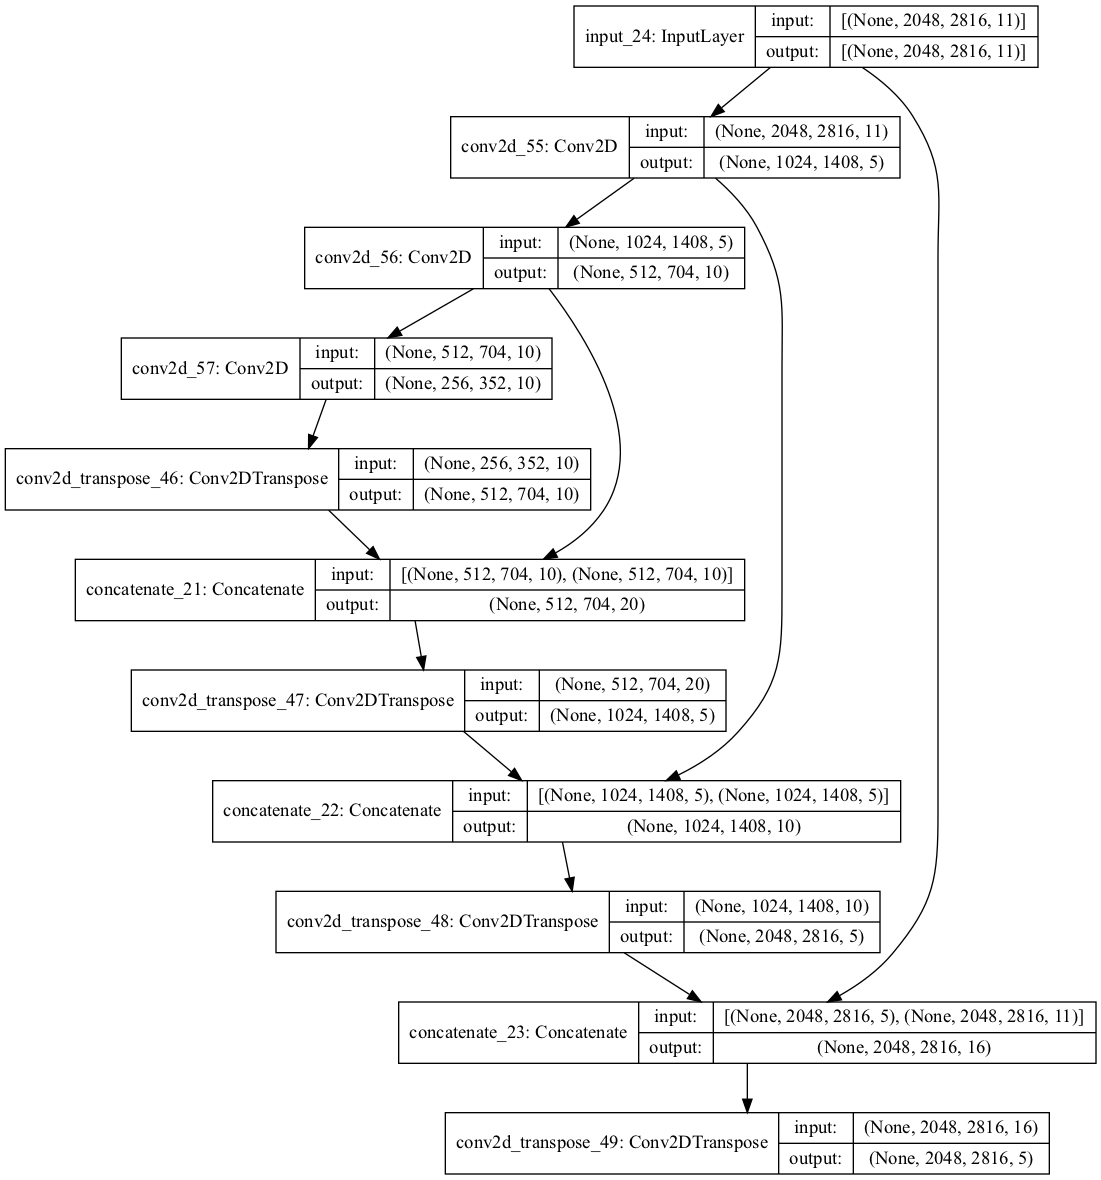

In [280]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [228]:
for image,mask,weights in train_dataset.take(1):
    sample_train_image,sample_train_mask = image, mask
print(sample_train_image.shape,sample_train_mask.shape)

#to show the 
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]


def show_train_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0,0], create_mask(pred_mask)])
  else:
    display([sample_train_image, sample_train_mask,
             create_mask(model.predict(sample_train_image[tf.newaxis, ...]))])
    

    
def display(display_list):
  plt.figure(figsize=(20, 20))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1,len(display_list),i+1)
    plt.title(title[i])
    if display_list[i].shape[-1]==1:
        mi = 0
        ma = 3
    else:
        mi = 4
        ma = 7
    plt.imshow(tf.keras.utils.array_to_img(display_list[i][:,:,mi:ma]))
    plt.axis('off')
  plt.show()


ValueError: not enough values to unpack (expected 3, got 2)

2022-06-08 11:28:23.240632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


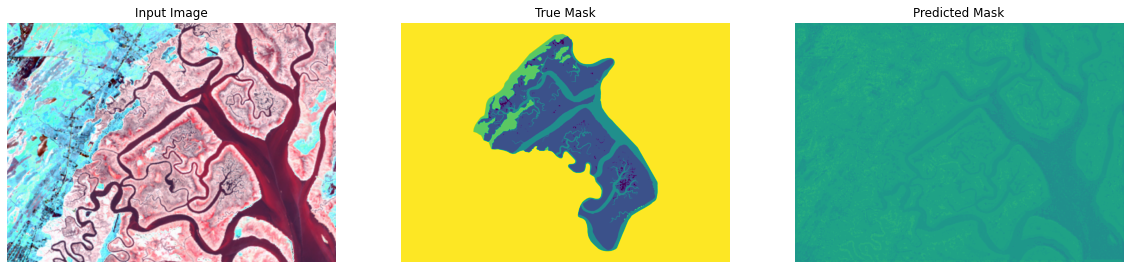

In [206]:
show_train_predictions()

In [207]:
from IPython.display import clear_output
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if epoch % 5==0:
        clear_output(wait=True)
        show_train_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))
tb_callback = tf.keras.callbacks.TensorBoard('./logs/SimpleSampleWeights', update_freq=5)

2022-06-08 11:28:28.289992: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-06-08 11:28:28.290029: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-06-08 11:28:28.290557: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


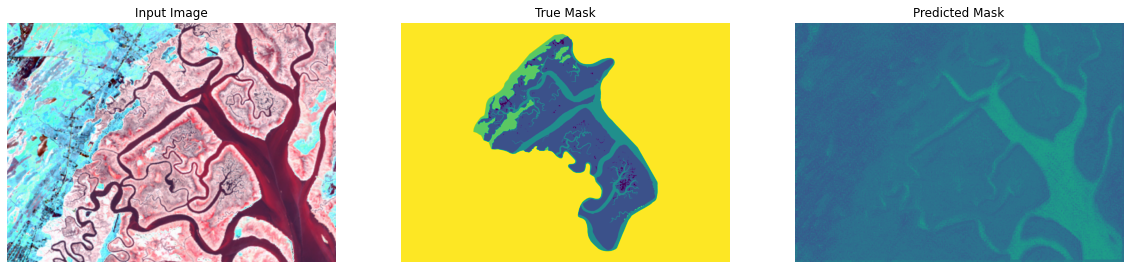


Sample Prediction after epoch 196

Epoch 197/200
1/1 [==============================] - 2s 2s/step - loss: 0.5402 - accuracy: 0.2273

Sample Prediction after epoch 197

Epoch 198/200
1/1 [==============================] - 2s 2s/step - loss: 0.5398 - accuracy: 0.2271

Sample Prediction after epoch 198

Epoch 199/200
1/1 [==============================] - 2s 2s/step - loss: 0.5393 - accuracy: 0.2268

Sample Prediction after epoch 199

Epoch 200/200
1/1 [==============================] - 2s 2s/step - loss: 0.5388 - accuracy: 0.2265

Sample Prediction after epoch 200



In [208]:
EPOCHS = 200
#VAL_SUBSPLITS = 5
#VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

#get validation working!

model_history = model.fit(weighted_train_batches, 
                          #class_weight = {0:1,1:1,2:1,3:1,4:0},
                          #sample_weight = weights,
                          epochs=EPOCHS,
                          #steps_per_epoch=STEPS_PER_EPOCH,
                          #validation_steps=VALIDATION_STEPS,
                          #validation_data=test_batches,
                          callbacks=[DisplayCallback(),tb_callback]
                         )

In [210]:
%reload_ext tensorboard

In [310]:
%tensorboard --logdir logs/

Reusing TensorBoard on port 6006 (pid 41510), started 6:35:21 ago. (Use '!kill 41510' to kill it.)

## Does it even work with the old method of sample weights?



In [188]:
masks.shape

(3, 1, 2048, 2816)

In [187]:
images.shape

(3, 11, 2048, 2816)

In [189]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_masks))

train_batches = (
    train_dataset
    .cache()
    #.shuffle(BUFFER_SIZE)
    .batch(3)
    #.repeat()
    #.map(Augment())
    .prefetch(buffer_size=tf.data.AUTOTUNE))

In [285]:
#super simple model
def shallow_model(output_channels:int):
    inputs = tf.keras.layers.Input(shape=[XDIM, YDIM, 11])
    
    #down
    x = tf.keras.layers.Conv2D(filters=10,kernel_size=2,strides=2,activation="relu",padding="same")(inputs)
    
    #x = tf.keras.layers.Conv2D(10,2,2,activation="relu")(x)
    
    
    #up
    #x = tf.keras.layers.Conv2DTranspose(5,2,2,activation="relu")(x)
    
    last = tf.keras.layers.Conv2DTranspose(
    filters=output_channels, kernel_size=2, strides=2,
    padding='same')
    
    x = last(x)
    
    return tf.keras.Model(inputs=inputs, outputs=x)

In [312]:
#less trivial model

def shallow_model(output_channels:int):
    inputs = tf.keras.layers.Input(shape=[None, None, 11])
    
    #down
    x = tf.keras.layers.Conv2D(filters=5,kernel_size=2,strides=2,activation="relu")(inputs)
    
    x = tf.keras.layers.Conv2D(10,2,2,activation="relu")(x)
    
    
    #up
    x = tf.keras.layers.Conv2DTranspose(5,2,2,activation="relu")(x)
    
    last = tf.keras.layers.Conv2DTranspose(
    filters=output_channels, kernel_size=2, strides=2,
    padding='same')
    
    x = last(x)
    
    return tf.keras.Model(inputs=inputs, outputs=x)

In [313]:
OUTPUT_CLASSES=5


#if we do 4 classes, I guess we'll need to set the loss to CategoricalCrossentropy. 
#But does pix2pix even work with that? It seemed to/not work earlier. 
model = shallow_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              weighted_metrics=['accuracy'])

2022-06-08 19:41:38.289756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


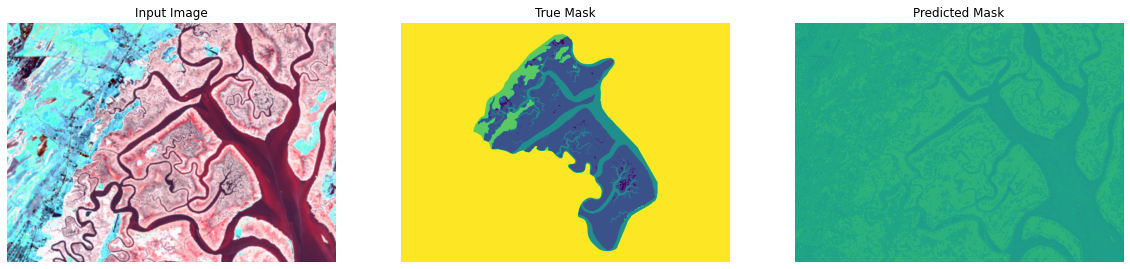

In [314]:
show_train_predictions()

In [161]:
## adding sample weights so that the final class is ignored 

def add_sample_weights(image, label):
  # The weights for each class, with the constraint that:
  #     sum(class_weights) == 1.0
  class_weights = tf.constant([1,1,1,1, 0.0])
  class_weights = class_weights/tf.reduce_sum(class_weights)

  # Create an image of `sample_weights` by using the label at each pixel as an 
  # index into the `class weights` .
  sample_weights = tf.gather(class_weights, indices=tf.cast(label, tf.int32))

  return image, label, sample_weights

In [212]:
train_batches.map(add_sample_weights).element_spec

(TensorSpec(shape=(None, 2048, 2816, 11), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 2048, 2816, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 2048, 2816, 1), dtype=tf.float32, name=None))

In [306]:
class OldWeightsCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if epoch % 5==0:
        clear_output(wait=True)
        show_train_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))
tb_callback = tf.keras.callbacks.TensorBoard('./logs/Linear500', update_freq=5)

2022-06-08 19:22:59.628475: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-06-08 19:22:59.628565: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-06-08 19:22:59.629952: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


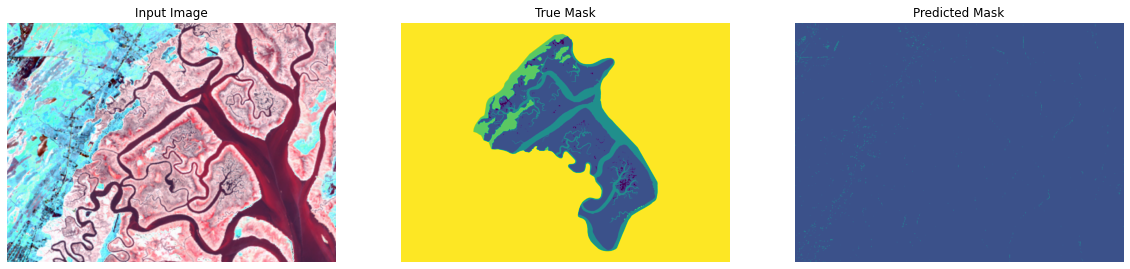


Sample Prediction after epoch 186

Epoch 187/500


KeyboardInterrupt: 

In [315]:
EPOCHS = 500
#VAL_SUBSPLITS = 5
#VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

#get validation working!

model_history = model.fit(#train_batches,
                          #class_weight = {0:1,1:1,2:1,3:1,4:0},
                          train_batches.map(add_sample_weights), 
                          epochs=EPOCHS,
                          #steps_per_epoch=STEPS_PER_EPOCH,
                          #validation_steps=VALIDATION_STEPS,
                          #validation_data=test_batches.map(add_sample_weights),
                          callbacks=[OldWeightsCallback(),tb_callback]
                         )

## Trying to look at predictions to understand it

In [291]:
pred_mask = model.predict(sample_train_image[tf.newaxis, ...])

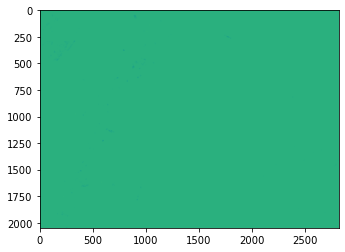

In [293]:
plt.imshow(pred_mask[0,:,:,0])

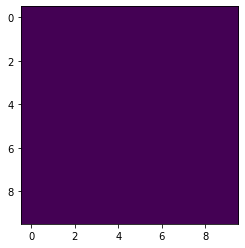

In [301]:
plt.imshow(pred_mask[0,1750:1760,2500:2510,4])

In [303]:
np.array(pred_mask[0,1750:1755,2500:2505,:])

array([[[-0.09293154,  0.06080406,  0.07205952, -0.02548256,
         -0.0788441 ],
        [-0.09293154,  0.06080406,  0.07205952, -0.02548256,
         -0.0788441 ],
        [-0.09293154,  0.06080406,  0.07205952, -0.02548256,
         -0.0788441 ],
        [-0.09293154,  0.06080406,  0.07205952, -0.02548256,
         -0.0788441 ],
        [-0.09293154,  0.06080406,  0.07205952, -0.02548256,
         -0.0788441 ]],

       [[-0.09293154,  0.06080406,  0.07205952, -0.02548256,
         -0.0788441 ],
        [-0.09293154,  0.06080406,  0.07205952, -0.02548256,
         -0.0788441 ],
        [-0.09293154,  0.06080406,  0.07205952, -0.02548256,
         -0.0788441 ],
        [-0.09293154,  0.06080406,  0.07205952, -0.02548256,
         -0.0788441 ],
        [-0.09293154,  0.06080406,  0.07205952, -0.02548256,
         -0.0788441 ]],

       [[-0.09293154,  0.06080406,  0.07205952, -0.02548256,
         -0.0788441 ],
        [-0.09293154,  0.06080406,  0.07205952, -0.02548256,
         -0

In [302]:
np.histogram(pred_mask)

(array([      12,       47,      590,     4201, 28809922,    18408,
            2321,      245,       58,       36]),
 array([-19.334759 , -15.285769 , -11.23678  ,  -7.1877904,  -3.1388009,
          0.9101887,   4.959178 ,   9.008167 ,  13.0571575,  17.106146 ,
         21.155136 ], dtype=float32))

In [296]:
mask_max = create_mask(pred_mask)

In [276]:
mask_max.shape

TensorShape([2048, 2816, 1])

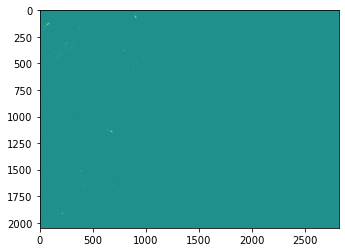

In [297]:
plt.imshow(mask_max)

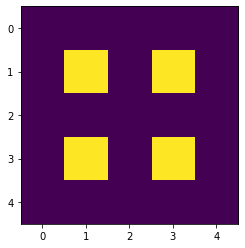

In [278]:
plt.imshow(mask_max[1750:1755,2500:2505,0])

In [282]:
model.save('2000-deep')

2022-06-08 19:08:42.893760: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: 2000-deep/assets
